## What are we trying to achieve here? 

I got questions: 
* What are the 2 or 3 most common characteristics of people subscribing? (Won opportunities) **Done**
* What about the campaigns, do they work? **Duration seems to be working**
* What is there to be done? What plan would I follow to attract more clients? 


## CRISP - DM Method

* Barry - Business Understanding
* Drove - Data Understanding
* Directly to the - Data Prep
* Medical - Modeling
* Emergency - Evaluation
* Department - Deployment


## 1. Business Understanding

- Banking Dataset
- Direct Marketing Campaigns of Banking Institution
- Data for 2 years 45,211 rows orderred by date
- This dataset is publicly available for research. It has been picked up from the UCI Machine Learning with random sampling and a few additional columns.
- Please add this citation if you use this dataset for any further analysis.
 S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv('dataset.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Evaluate quality of the data, are there any null values to clean?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Visualize data 

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

#### Univariate analysis of categorical features

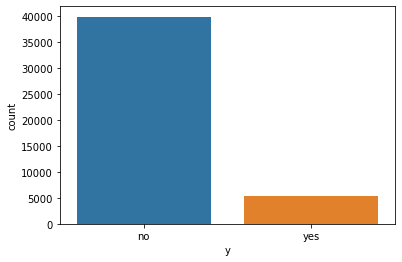

In [8]:
sns.countplot(x=df.y)
plt.show()

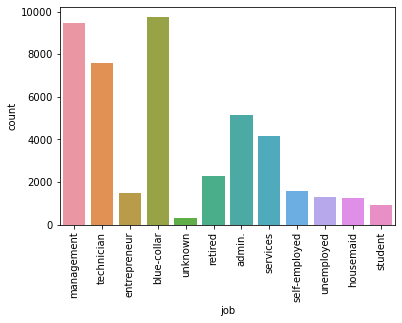

In [9]:
# Distribution of job feature
sns.countplot(x=df.job)
plt.xticks(rotation=90)
plt.show()

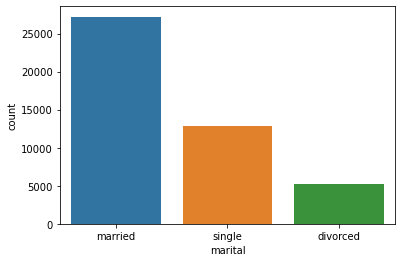

In [10]:
# Distribution of marital feature
sns.countplot(x=df.marital)
plt.show()

###  To do: 
* Fix unknown with mode for education and contact **DONE**

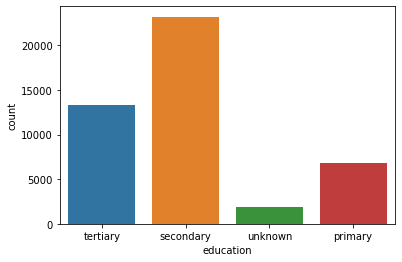

In [11]:
# Distribution of education feature
sns.countplot(x=df.education)
plt.show()

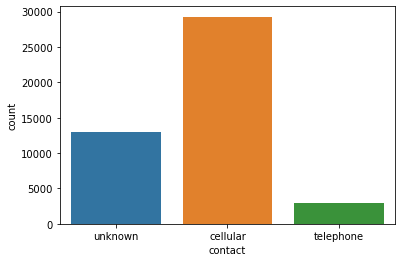

In [12]:
# Distribution of contact feature
sns.countplot(x=df.contact)
plt.show()

#### Bivariate analysis of Categorical features with target features.

### To Do:
* bivariate analysis for the other categorical features as well **DONE**

<AxesSubplot:xlabel='marital', ylabel='count'>

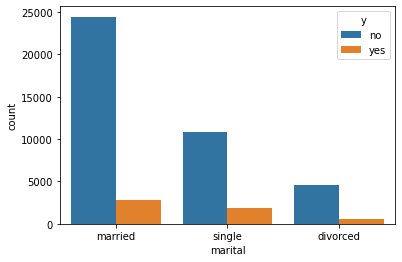

In [13]:
sns.countplot(x="marital", hue="y", data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

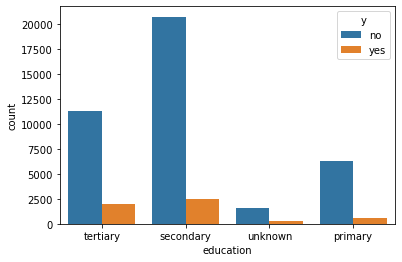

In [14]:
sns.countplot(x='education', hue='y', data=df)

<AxesSubplot:xlabel='contact', ylabel='count'>

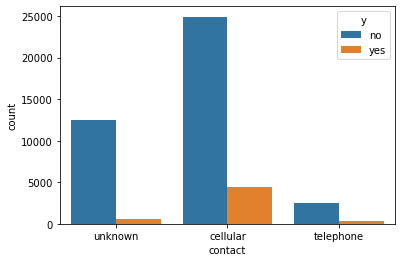

In [15]:
sns.countplot(x='contact', hue='y', data=df)

### What about the marketing campaigns? Do they work? How? 
#### TO DO 
* Visualization between campaign features and y

<AxesSubplot:xlabel='duration', ylabel='count'>

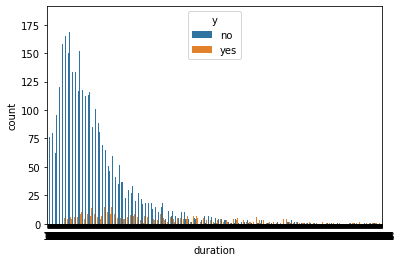

In [16]:
sns.countplot(x='duration', hue='y',data=df)


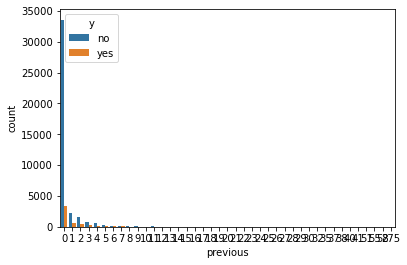

In [17]:
# Prepei vroume ta statistika, poso einai to pososto gia previous = 0,1,2,3.. etc..
g = sns.countplot(x='previous', hue='y', data=df)


<AxesSubplot:xlabel='poutcome', ylabel='count'>

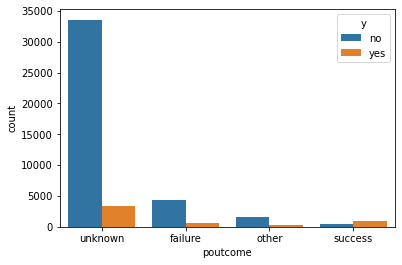

In [18]:
# Edw vlepoume ti ginetai me proigoumena campaigns otan einai won i lost... 
# fusika exoume polu xameni pliroforia me to unknown..
sns.countplot(x='poutcome', hue='y', data=df)

Με ηλικία και balance δεν γίνει κάτι ιδιαίτερο, το έσβησα και βλέπουμε.. 

Text(0.5, 1.0, 'Duration - Converting ViolinPlot')

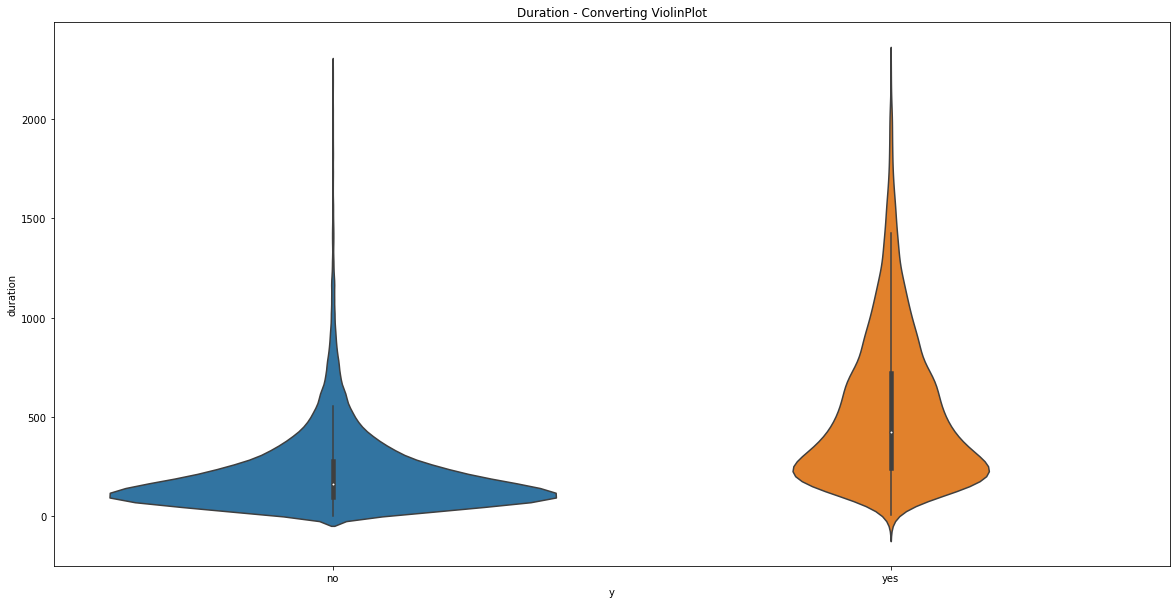

In [19]:
plt.figure(figsize=(20,10))
sns.violinplot(x='y', y='duration', data=df[df.duration < 2300]).set_title('Duration - Converting ViolinPlot')
# Edo vlepoume mia tasi, oso megalitero to duration tou phone call psisimatos, toso pio pithano na ginei convert
# To kratame

Text(0.5, 1.0, 'Campaign - Converting ViolinPlot')

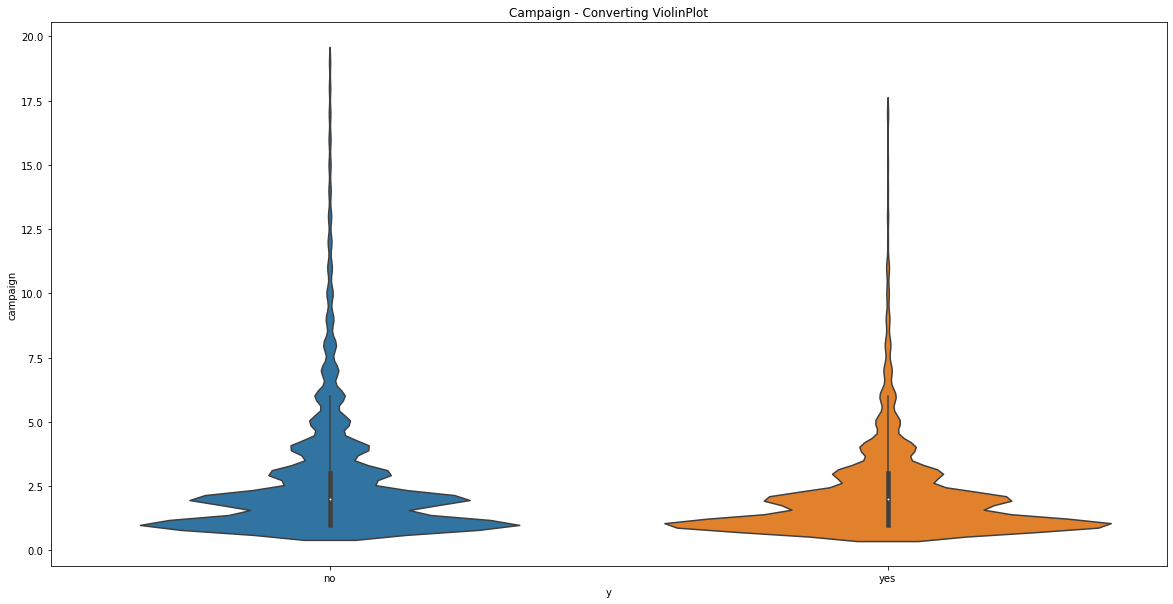

In [20]:
plt.figure(figsize=(20,10))
sns.violinplot(x='y', y='campaign', data=df[df.campaign<20]).set_title('Campaign - Converting ViolinPlot')
# Poses fores irthan se epikoinonia, 1.25 peripou fainetai na einai ta perissotera nai..to opoio meta tis 3 
# meiwnetai simantika
# To kratame me erotimatiko

### Correlation

In [21]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


## 3. Data Preparation
* One hot Encoding
* Unknown -> mode 

### Filling unknown values

#### Job Unknown Values

In [22]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [23]:
# We can fill unknown job values with mode value but also we can fill unknown job 
# values with mode of education degree per job.

In [24]:
educationRatio = pd.DataFrame({'Job' : []})
for i in df['job'].unique():
    educationRatio = educationRatio.append(df[(df["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / df[(df["job"] == i)]["education"].value_counts().sum())
educationRatio["Job"] = df["job"].unique()
educationRatio

,Job,education
tertiary,management,82.480440
secondary,technician,68.829801
tertiary,entrepreneur,46.133154
secondary,blue-collar,55.189067
unknown,unknown,44.097222
secondary,retired,43.462898
secondary,admin.,81.589635
secondary,services,83.220992
tertiary,self-employed,52.754908
secondary,unemployed,55.871067


In [25]:
df.loc[(df.job == "unknown") & (df.education == "secondary"),"job"] = "services"
df.loc[(df.job == "unknown") & (df.education == "primary"),"job"] = "housemaid"
df.loc[(df.job == "unknown") & (df.education == "tertiary"),"job"] = "management"
df.loc[(df.job == "unknown"),"job"] = "blue-collar"

In [26]:
df['job'].value_counts()

blue-collar      9859
management       9497
technician       7597
admin.           5171
services         4225
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1291
student           938
Name: job, dtype: int64

 #### Education Unknown Values

In [27]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [28]:
# Filling unknown values with educationRatio again

df.loc[(df.education == "unknown") & (df.job == "admin."),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "management"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "services"),"education"] = "tertiary"
df.loc[(df.education == "unknown") & (df.job == "technician."),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "retired"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "blue-collar"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "housemaid."),"education"] = "primary"
df.loc[(df.education == "unknown") & (df.job == "self-employed"),"education"] = "tertiary"
df.loc[(df.education == "unknown") & (df.job == "student"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "entrepreneur"),"education"] = "tertiary"
df.loc[(df.education == "unknown") & (df.job == "unemployed"),"education"] = "secondary"

#REST CAN BE SECONDARY
df.loc[(df.education == "unknown"),"education"] = "secondary"

In [29]:
df['education'].value_counts()

secondary    24794
tertiary     13566
primary       6851
Name: education, dtype: int64

In [30]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [31]:
# I will replace unknown values with mode value for contact

df['contact'].replace(['unknown'],df['contact'].mode(), inplace=True)

In [32]:
df['contact'].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

##### Housing and loan looks good

In [33]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [34]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

### One hot encoding

#### In order to use our categorical columns, we have to transform them into numeric columns

* Job

In [35]:
#OneHotEncoding of job column
ohe = OneHotEncoder(sparse = False)
df = pd.concat((df , pd.DataFrame(ohe.fit_transform(df["job"].to_frame()),columns = "job_" + np.sort(df["job"].unique()))),axis = 1)
#df.drop(columns = ["job"],inplace = True)

* Marital

In [36]:
df = pd.concat((df , pd.DataFrame(ohe.fit_transform(df["marital"].to_frame()),columns = "marital_" + np.sort(df["marital"].unique()))),axis = 1)
df.drop(columns = ["marital"],inplace = True)

* Education

In [37]:
df.loc[(df.education == 'primary'), 'education'] = 1
df.loc[(df.education == 'secondary'), 'education'] = 2
df.loc[(df.education == 'tertiary'), 'education'] = 3

* Default

In [38]:
df.loc[(df.default == 'yes'), 'default'] = 1
df.loc[(df.default == 'no'), 'default'] = 0

* Housing

In [39]:
df.loc[(df.housing == 'yes'),'housing'] = 1
df.loc[(df.housing == 'no') ,'housing'] = 0

* Loan

In [40]:
df.loc[(df.loan == 'yes'), 'loan'] = 1
df.loc[(df.loan == 'no'), 'loan'] = 0

* Contact

In [41]:
df.loc[(df.contact == 'telephone'), 'contact'] = 1
df.loc[(df.contact == 'cellular'), 'contact'] = 0

* y

In [42]:
df.loc[(df.y == 'yes'), 'y'] = 1
df.loc[(df.y == 'no'), 'y'] = 0

In [43]:
df.head()

,age,job,education,default,balance,housing,loan,contact,day,month,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,58,management,3,0,2143,1,0,0,5,may,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,44,technician,2,0,29,1,0,0,5,may,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,entrepreneur,2,0,2,1,1,0,5,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,47,blue-collar,2,0,1506,1,0,0,5,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33,blue-collar,2,0,1,0,0,0,5,may,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
df.balance.sort_values()

12909     -8019
15682     -6847
38736     -4057
7413      -3372
1896      -3313
          ...  
41693     71188
42558     81204
43393     81204
26227     98417
39989    102127
Name: balance, Length: 45211, dtype: int64

In [45]:
df.loc[(df.balance > 66721),"balance"] = 66721
#Lets scale balance column.
df["balance"]= df["balance"] / 66721

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   job                45211 non-null  object 
 2   education          45211 non-null  object 
 3   default            45211 non-null  object 
 4   balance            45211 non-null  float64
 5   housing            45211 non-null  object 
 6   loan               45211 non-null  object 
 7   contact            45211 non-null  object 
 8   day                45211 non-null  int64  
 9   month              45211 non-null  object 
 10  duration           45211 non-null  int64  
 11  campaign           45211 non-null  int64  
 12  pdays              45211 non-null  int64  
 13  previous           45211 non-null  int64  
 14  poutcome           45211 non-null  object 
 15  y                  45211 non-null  object 
 16  job_admin.         452

In [47]:
# Before training we should transform object dtypes to int beacause some classifiers won't work with object dtype
# Auta exoun meinei pou den ginontai

df.education = df.education.astype(int)
df.default = df.default.astype(int)
df.housing = df.housing.astype(int)
df.loan = df.loan.astype(int)
df.contact = df.contact.astype(int)
df.y = df.y.astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   job                45211 non-null  object 
 2   education          45211 non-null  int32  
 3   default            45211 non-null  int32  
 4   balance            45211 non-null  float64
 5   housing            45211 non-null  int32  
 6   loan               45211 non-null  int32  
 7   contact            45211 non-null  int32  
 8   day                45211 non-null  int64  
 9   month              45211 non-null  object 
 10  duration           45211 non-null  int64  
 11  campaign           45211 non-null  int64  
 12  pdays              45211 non-null  int64  
 13  previous           45211 non-null  int64  
 14  poutcome           45211 non-null  object 
 15  y                  45211 non-null  int32  
 16  job_admin.         452

<AxesSubplot:>

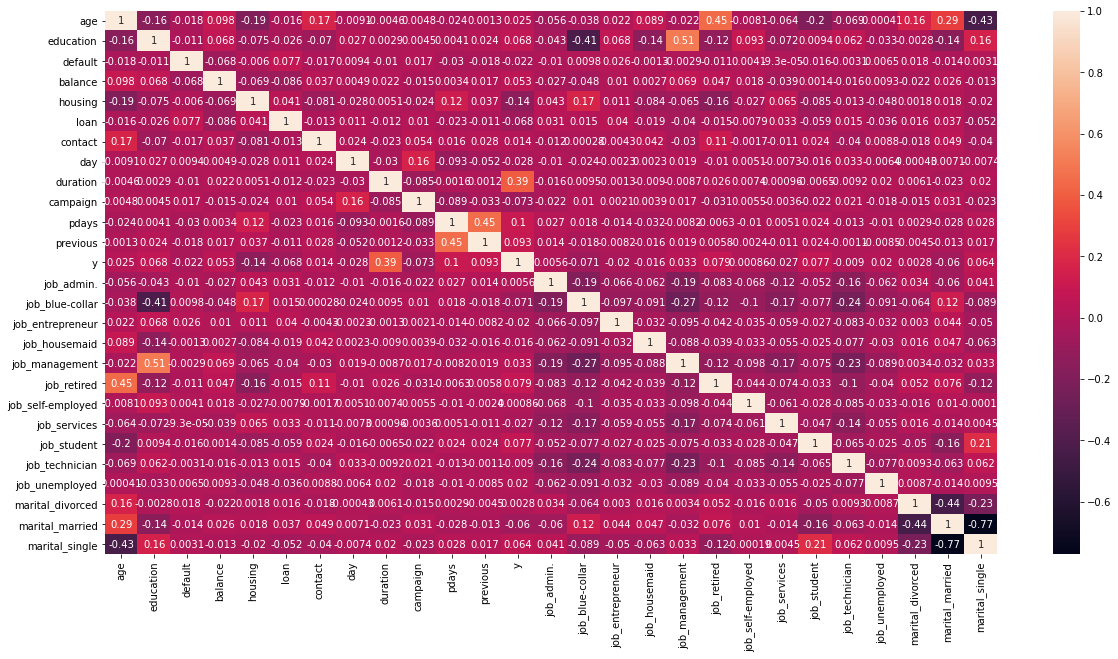

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)

Not so much correlation between y and the other features.. The most correlation is between y and duration of the call. 

## 4. Modeling

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, classification_report, fbeta_score

# Define seed for repeatability
SEED = 42
np.random.seed(SEED)

In [76]:
y = df.y.values
X = df.drop(columns = ["job","month","poutcome","y"])
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.25, random_state = 10)

### Decision Tree Classifier

In [74]:
# Define the model
dc = DecisionTreeClassifier(max_depth=30, min_samples_split=10, min_samples_leaf=10,
                            random_state=SEED, class_weight="balanced")

In [78]:
# Define a scorer
rs = make_scorer(recall_score)

# Cross validation
cv = cross_val_score(dc, X_train, y_train, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

Cross validation scores: [0.77889447 0.71356784 0.71859296 0.75376884 0.68592965 0.75879397
 0.68090452 0.70603015 0.73803526 0.72544081]
0.73 recall with a standard deviation of 0.03


In [79]:
# Fit the model on the complete train dataset
dc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [81]:
# Get predictions from the train dataset
pred = dc.predict(X_train)
print("The train recall score is {}".format(np.round(recall_score(y_train, pred), 2)))

The train recall score is 0.95


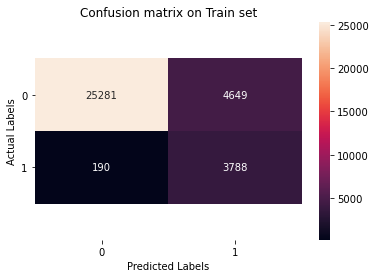

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     29930
           1       0.45      0.95      0.61      3978

    accuracy                           0.86     33908
   macro avg       0.72      0.90      0.76     33908
weighted avg       0.93      0.86      0.88     33908



In [82]:
plt.title("Confusion matrix on Train set")
ax = sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_train, pred))

In [83]:
# Get predictions from the test dataset
pred = dc.predict(X_test)
print("The test recall score is {}".format(np.round(recall_score(y_test, pred), 2)))

The test recall score is 0.72


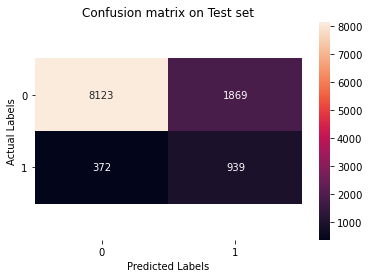

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      9992
           1       0.33      0.72      0.46      1311

    accuracy                           0.80     11303
   macro avg       0.65      0.76      0.67     11303
weighted avg       0.88      0.80      0.83     11303



In [84]:
plt.title("Confusion matrix on Test set")
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, pred))

### Random Forest Classifier

Cross validation scores: [0.23869347 0.26130653 0.22361809 0.25879397 0.24120603 0.25879397
 0.26633166 0.25879397 0.26952141 0.26952141]
0.25 recall with a standard deviation of 0.01
The train recall score is 1.0


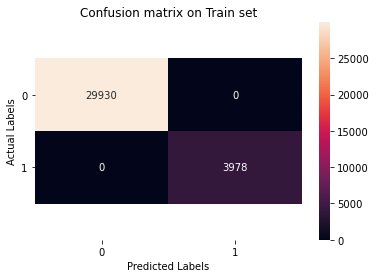

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29930
           1       1.00      1.00      1.00      3978

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908

The test recall score is 0.26


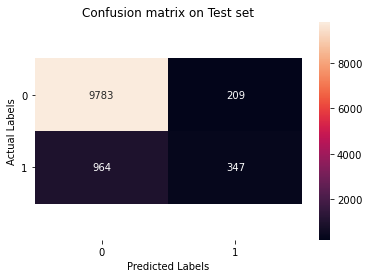

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9992
           1       0.62      0.26      0.37      1311

    accuracy                           0.90     11303
   macro avg       0.77      0.62      0.66     11303
weighted avg       0.88      0.90      0.88     11303



In [86]:
rf = RandomForestClassifier(n_jobs=-1, random_state=SEED, class_weight="balanced_subsample")

# Define a scorer
rs = make_scorer(recall_score)

# Cross validation
cv = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1, scoring=rs)
print("Cross validation scores: {}".format(cv))
print("%0.2f recall with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

# Fit the model on the complete train dataset
rf.fit(X_train, y_train)

# Get predictions from the train dataset
pred = rf.predict(X_train)
print("The train recall score is {}".format(np.round(recall_score(y_train, pred), 2)))

plt.title("Confusion matrix on Train set")
ax = sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_train, pred))

# Get predictions from the test dataset
pred = rf.predict(X_test)
print("The test recall score is {}".format(np.round(recall_score(y_test, pred), 2)))

plt.title("Confusion matrix on Test set")
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, pred))

## 5. Evaluation

## 6. Deployment

Key Steps for Project
Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset. **Done**

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data: **Done**

Gather necessary data to answer your questions**Done**
Handle categorical and missing data**Done**
Provide insight into the methods you chose and why you chose them**Done**
Analyze, Model, and Visualize**Done**

Provide a clear connection between your business questions and how the data answers them.
4) Communicate your business insights:

Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience
Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

Created git for the project
To do: 
* Update README **DONE**
* Ask the questions and give answers with visual **almost, need to answer the last question**
* Did the modeling, nice classifier BUT gain knowledge on: recall(test and train) 